<a href="https://colab.research.google.com/github/anaPK6/Python-Models/blob/main/kl_Divergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy plotly scipy


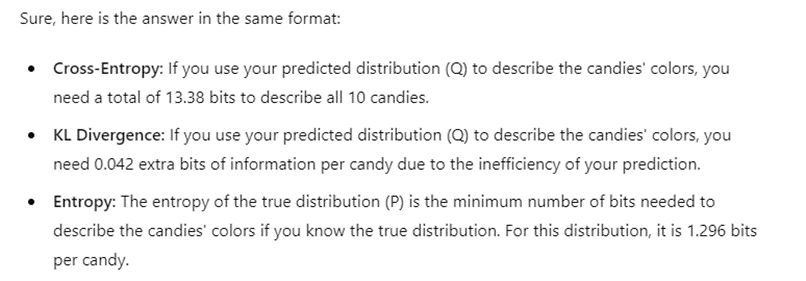

In [ ]:
import numpy as np
import plotly.graph_objects as go
from scipy.stats import entropy

# Generate data for a larger dataset (1000 data points)
np.random.seed(42)
true_distribution = np.random.normal(0, 1, 1000)  # True distribution centered at 0
predicted_distribution_close = np.random.normal(0.1, 1, 1000)  # Close prediction
predicted_distribution_drifted = np.random.normal(2, 1, 1000)  # Drifted prediction

# Calculate histograms
hist_true, bins = np.histogram(true_distribution, bins=50, density=True)
hist_pred_close, _ = np.histogram(predicted_distribution_close, bins=bins, density=True)
hist_pred_drifted, _ = np.histogram(predicted_distribution_drifted, bins=bins, density=True)

# Add a small value to avoid zero values
epsilon = 1e-10
hist_true += epsilon
hist_pred_close += epsilon
hist_pred_drifted += epsilon

# Normalize histograms to ensure they sum to 1
hist_true /= np.sum(hist_true)
hist_pred_close /= np.sum(hist_pred_close)
hist_pred_drifted /= np.sum(hist_pred_drifted)

# Calculate KL divergence
kl_divergence_close = entropy(hist_true, hist_pred_close)
kl_divergence_drifted = entropy(hist_true, hist_pred_drifted)

# Plot the distributions and KL divergence
fig = go.Figure()

# True distribution
fig.add_trace(go.Scatter(x=bins[:-1], y=hist_true, mode='lines', name='True Distribution', line=dict(color='blue')))

# Predicted close distribution
fig.add_trace(go.Scatter(x=bins[:-1], y=hist_pred_close, mode='lines', name='Predicted Close Distribution', line=dict(color='green')))

# Predicted drifted distribution
fig.add_trace(go.Scatter(x=bins[:-1], y=hist_pred_drifted, mode='lines', name='Predicted Drifted Distribution', line=dict(color='red')))

# Add arrows for visualizing KL divergence
fig.add_annotation(x=-3, y=0.35, text=f'KL Divergence (Close): {kl_divergence_close:.4f}', showarrow=True,
                   arrowhead=7, ax=-1, ay=0.3, arrowcolor='green', arrowsize=1)

fig.add_annotation(x=2, y=0.2, text=f'KL Divergence (Drifted): {kl_divergence_drifted:.4f}', showarrow=True,
                   arrowhead=7, ax=3, ay=0.3, arrowcolor='red', arrowsize=1)

# Update layout
fig.update_layout(title='KL Divergence Visualization',
                  xaxis_title='Value',
                  yaxis_title='Density',
                  legend_title='Distributions')

# Show plot
fig.show()
